#Fine-Tuning Transformers with PyTorch and Hugging Face

## Introduction
This tutorial demonstrates how to fine-tune a pre-trained transformer model for a text classification task using PyTorch and Hugging Face's transformers library. We'll focus on sentiment analysis, modifying a pre-trained model to better understand the sentiment of text. This process is vital for adapting general models to specific needs or datasets.

##Setting Up the Environment
First, ensure you're using a Google Colab notebook with GPU support for efficient training.

##Install Necessary Packages

In [1]:
!pip install -q torch torchvision
!pip install -q transformers
!pip install -q matplotlib

## Import Libraries


In [2]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AdamW
import matplotlib.pyplot as plt

## Understanding Transformers and Transfer Learning
Transformers use self-attention mechanisms to capture relationships in data, excelling in tasks requiring context understanding. Transfer learning adapts a pre-trained model to a new, but related, task, saving on resources and training time.

## Loading a Pre-Trained Model
We'll start with a model pre-trained on a large corpus and fine-tune it for our specific task.

In [3]:
model_name = "distilbert-base-uncased"
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
tokenizer = AutoTokenizer.from_pretrained(model_name)

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

## Preparing the Dataset
Assume you have a dataset with texts and corresponding sentiment labels. Here's how to preprocess it:

In [4]:
# Sample data
texts = ["I love this product!", "Worst experience ever."]
labels = [1, 0]  # 1 for positive, 0 for negative sentiment

# Tokenize and encode texts
inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
labels = torch.tensor(labels)

# Create a torch dataset
dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'], labels)
loader = DataLoader(dataset, batch_size=2)

## Fine-Tuning the Model
Adjust the pre-trained model to your specific task by continuing the training process.

## Define Optimizer and Training Loop

In [5]:
optimizer = AdamW(model.parameters(), lr=1e-5)

model.train()
for epoch in range(3):  # number of epochs
    for batch in loader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        print(f"Epoch {epoch}, Loss: {loss.item()}")

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 0, Loss: 0.7034775018692017
Epoch 1, Loss: 0.6800037026405334
Epoch 2, Loss: 0.6643761396408081


## Save the Fine-Tuned Model
After fine-tuning, save the model for later use.

In [6]:
model.save_pretrained("my_finetuned_model")

## Making Predictions
With the fine-tuned model, you can now make predictions on new data.

In [7]:
def predict_sentiment(text):
    model.eval()
    inputs = tokenizer(text, return_tensors='pt')
    with torch.no_grad():
        logits = model(**inputs).logits
    probabilities = torch.nn.functional.softmax(logits, dim=-1)
    return probabilities

## Visualizing Predictions
Visualize the sentiment predictions as a bar chart.

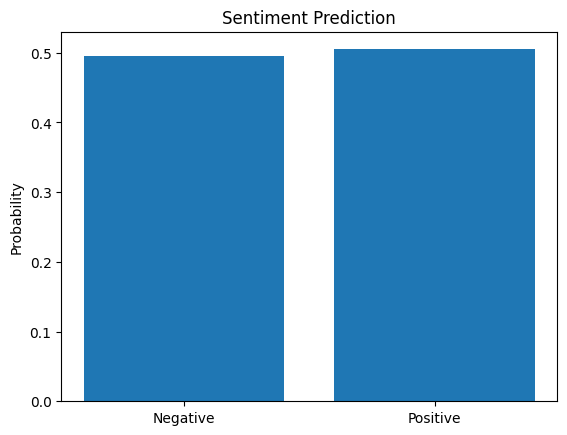

In [8]:
def show_prediction(text):
    probabilities = predict_sentiment(text)
    plt.bar(range(len(probabilities[0])), probabilities[0])
    plt.title('Sentiment Prediction')
    plt.xticks(range(len(probabilities[0])), ['Negative', 'Positive'])
    plt.ylabel('Probability')
    plt.show()

# Test with a new text
show_prediction("I love using transformers for NLP!")


## Ensuring Reproducibility
Note the versions of the key packages used for others to reproduce your results.

In [10]:
import transformers
print("Torch Version:", torch.__version__)
print("Transformers Version:", transformers.__version__)

Torch Version: 2.1.0+cu121
Transformers Version: 4.35.2


## Conclusion
Fine-tuning pre-trained transformers allows you to leverage their power for your specific tasks and datasets. It's a potent way to achieve high performance with less data and computational resources. Stay updated with the latest models and practices, and always monitor your model's performance.